# Intermediate graphs
In this Chapter, we will focus on graphical methods for displaying relationships between two varibles (bivariate reletionships) and between many varibles (multivariate relationships).

## Scatter Plots
A scatter plot with best-fit lines

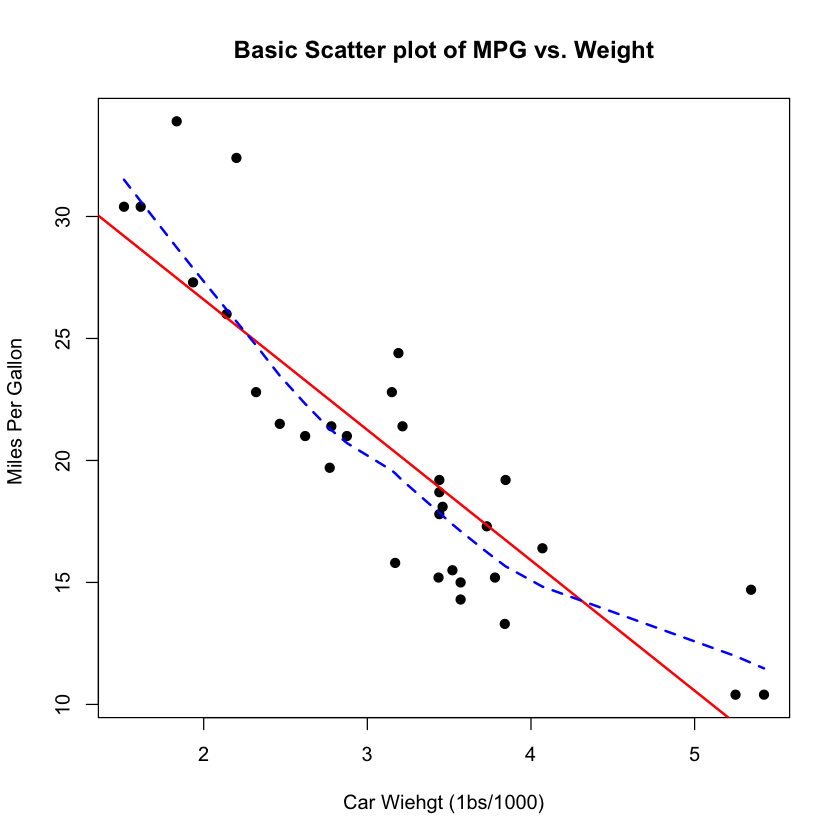

In [1]:
attach(mtcars)
plot(wt, mpg, 
    main = "Basic Scatter plot of MPG vs. Weight",
    xlab = "Car Wiehgt (1bs/1000)",
    ylab = "Miles Per Gallon ", 
    pch = 19)
abline(lm(mpg ~ wt), col='red', lwd=2, lty=1)
lines(lowess(wt, mpg), col = 'blue', lwd=2, lty=2)


A more complex version of the previous plot

Loading required package: carData


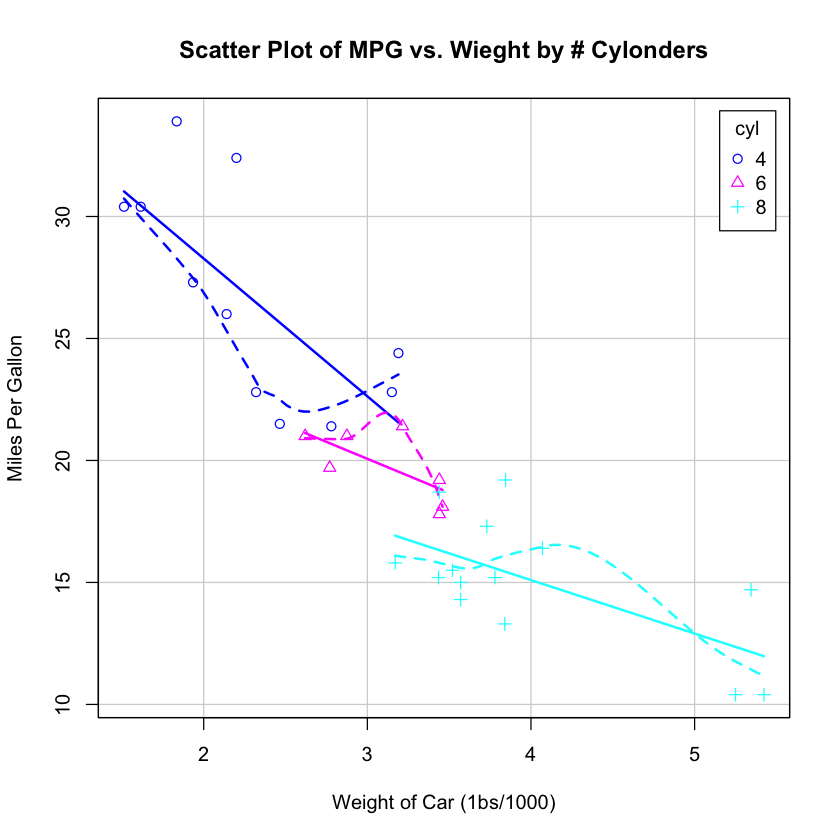

In [2]:
library(car)
scatterplot(mpg ~ wt|cyl, data = mtcars, lwd=2, grid = TRUE,
            main = "Scatter Plot of MPG vs. Wieght by # Cylonders",
            xlab = "Weight of Car (1bs/1000)",
            ylab = "Miles Per Gallon",
            legend = list(coords="topright"),
#             id.method = "identify",
#             log = row.names(mtcars),
#             boxplot = "xy"
           )

### scatter-plot matrices
There are many useful functions for creating scatter-plot matrices in R. A basic scatter-plot matrix can be created with the $pairs()$ function.

$pairs()$ function could be used to find some raw pattern in data.

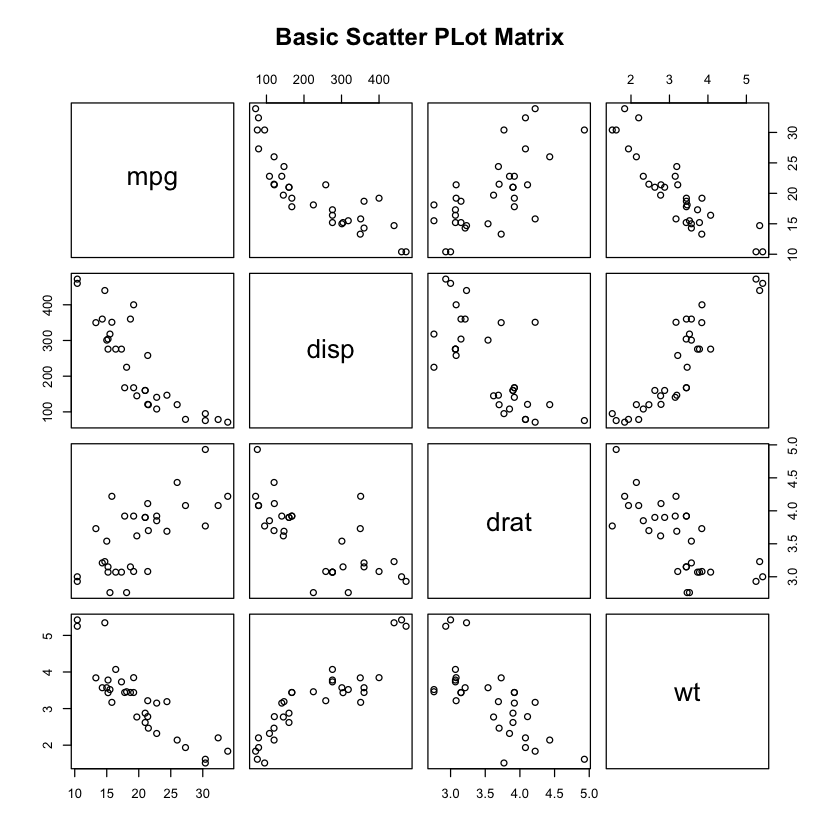

In [3]:
pairs(~mpg+disp+drat+wt, data = mtcars,
      main = "Basic Scatter PLot Matrix"
     )

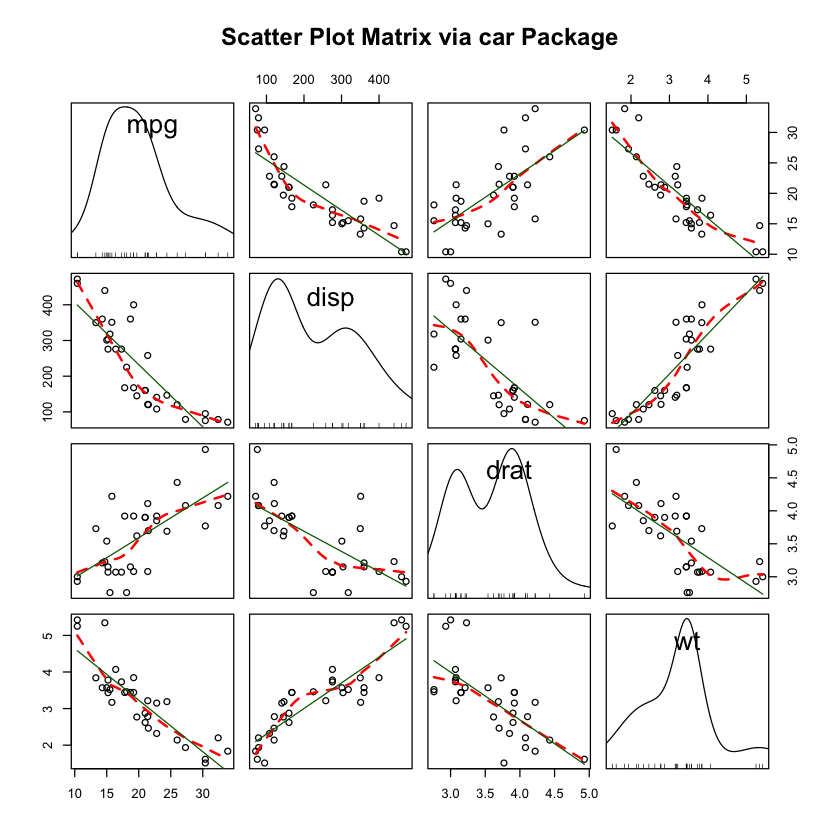

In [4]:
scatterplotMatrix(~ mpg + disp + drat + wt, data = mtcars,
                  smooth = list(spread=FALSE, col.smooth='red', lty=2),
                  regLine = list(method=lm, lty=1, lwd=1, col='darkgreen'),
                  col = 'black',
                  main = "Scatter Plot Matrix via car Package"
                 )

### High-density scatter plots

In [5]:
set.seed(1234)
n = 10000
c1 = matrix(rnorm(n, mean=0, sd=.5), ncol=2)
c2 = matrix(rnorm(n, mean=3, sd=2), ncol=2)
mydata = rbind(c1, c2)
mydata = as.data.frame(mydata)
names(mydata) = c('x', 'y')

if we use $plot()$ function to plot scatter, we will find that the overlap of data points in figure makes it difficult to discern the relationship between x and y.

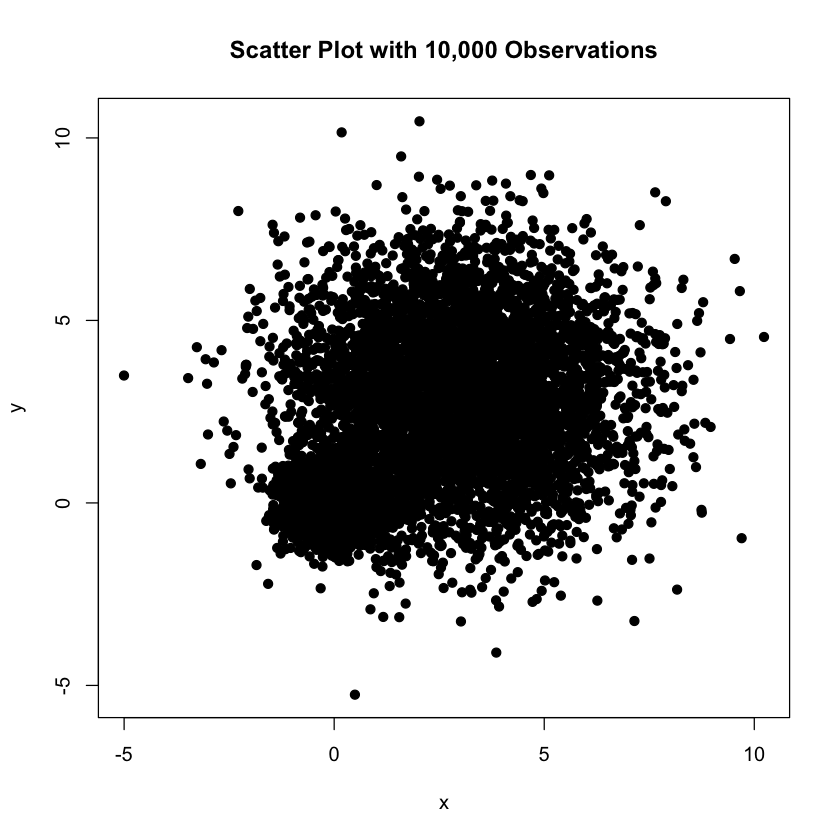

In [6]:
with(mydata, 
     plot(x, y, pch = 19, 
          main="Scatter Plot with 10,000 Observations"))

The $smoothScatter()$ function uses a kernel-density estimate to produce smoothed color density representation of the scatter plot.

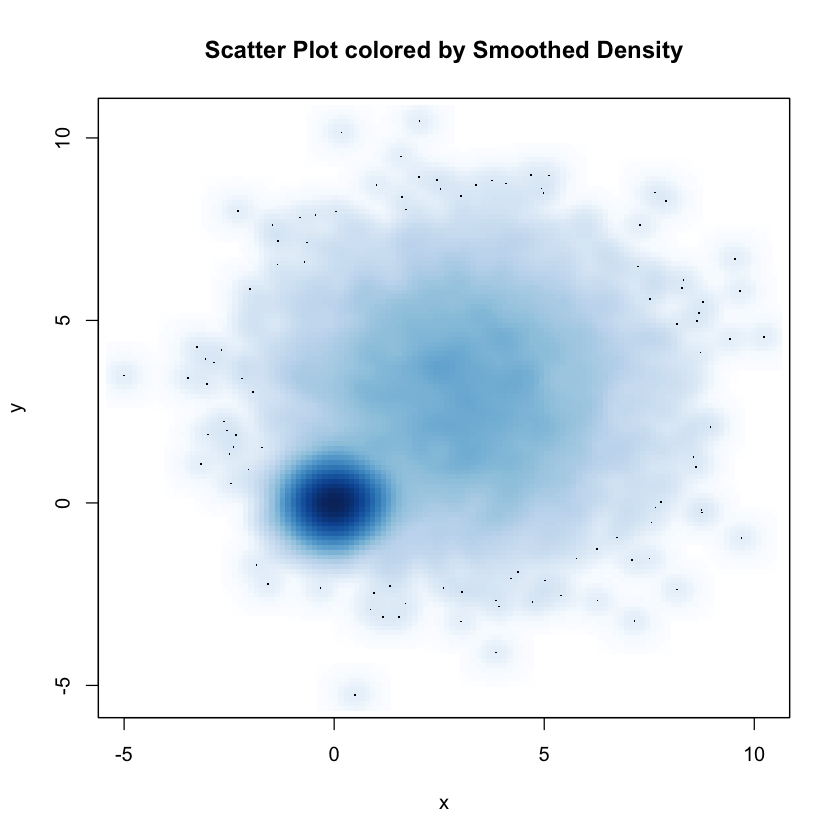

In [7]:
with(mydata, 
     smoothScatter(x, y, 
                   main="Scatter Plot colored by Smoothed Density"))

Using $hexbin()$ function in the hexbin package provides bivariate binning into hexagonal cells (it looks better than it sounds)

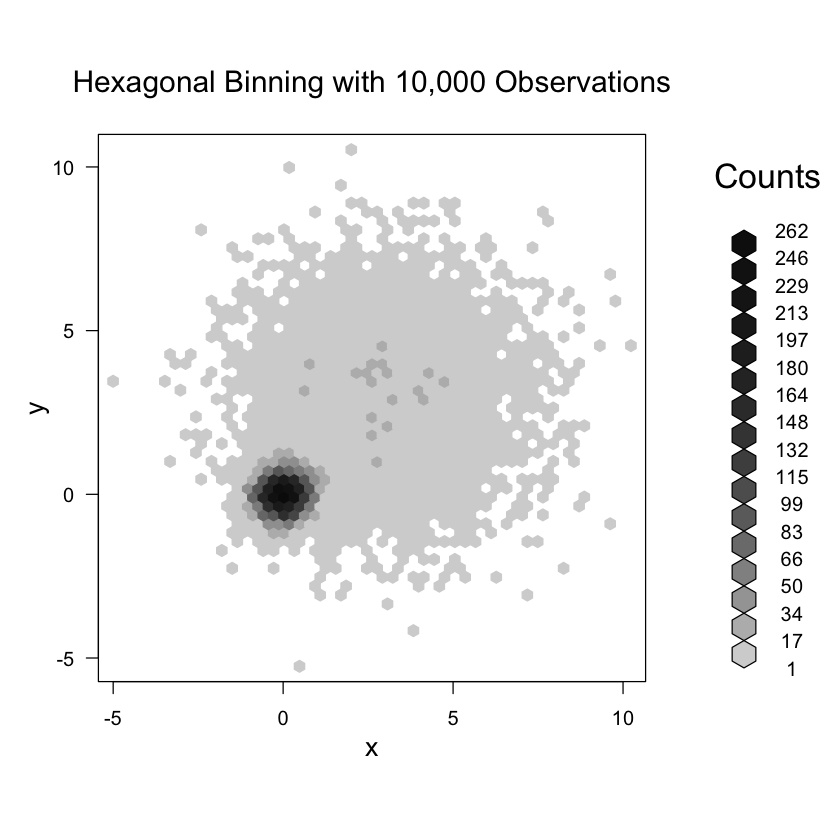

In [13]:
library(hexbin)
with(mydata, {
    bin = hexbin(x, y, xbins = 50)
    plot(bin,
         main = "Hexagonal Binning with 10,000 Observations")
})

### 3D scatter plots
Scatter plots and scatter-plot matrices display bivariate relationships. What if you want to visualize the interaction of three quantitative variables at once? We could use 3D plot (such as function $scatterplot3d()$ ).

The following objects are masked from mtcars (pos = 7):

    am, carb, cyl, disp, drat, gear, hp, mpg, qsec, vs, wt



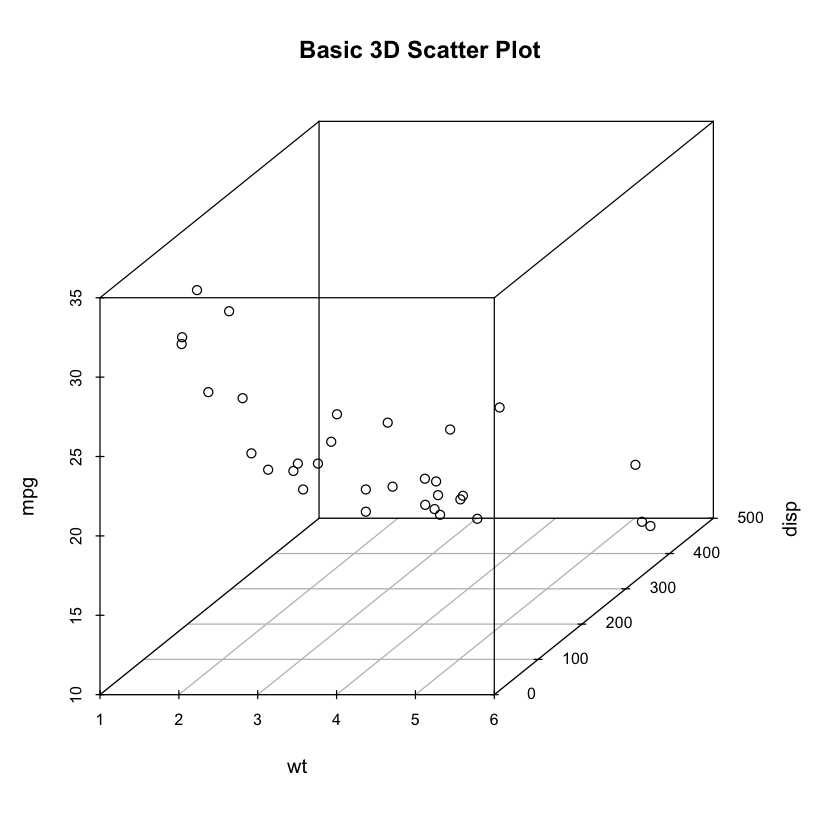

In [14]:
library(scatterplot3d)
attach(mtcars)
scatterplot3d(wt, disp, mpg, 
              main = "Basic 3D Scatter Plot")

The $scatterplot3d()$ function offers manu options, including the ability to specify symbols, axes, colors, lines, grids, highlighting, and angles. For example

The following objects are masked from mtcars (pos = 3):

    am, carb, cyl, disp, drat, gear, hp, mpg, qsec, vs, wt

The following objects are masked from mtcars (pos = 4):

    am, carb, cyl, disp, drat, gear, hp, mpg, qsec, vs, wt

The following objects are masked from mtcars (pos = 5):

    am, carb, cyl, disp, drat, gear, hp, mpg, qsec, vs, wt

The following objects are masked from mtcars (pos = 6):

    am, carb, cyl, disp, drat, gear, hp, mpg, qsec, vs, wt

The following objects are masked from mtcars (pos = 7):

    am, carb, cyl, disp, drat, gear, hp, mpg, qsec, vs, wt

The following objects are masked from mtcars (pos = 8):

    am, carb, cyl, disp, drat, gear, hp, mpg, qsec, vs, wt

The following objects are masked from mtcars (pos = 13):

    am, carb, cyl, disp, drat, gear, hp, mpg, qsec, vs, wt



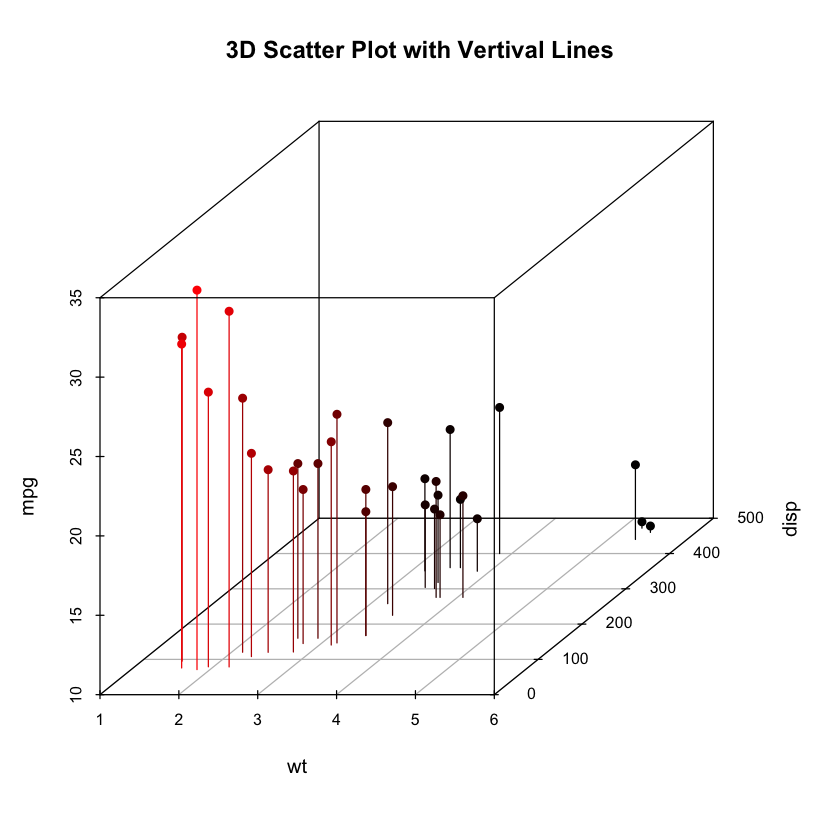

In [20]:
library(scatterplot3d)
attach(mtcars)
scatterplot3d(wt, disp, mpg, 
              pch = 16,
              highlight.3d = TRUE,
              type = "h",
              main = "3D Scatter Plot with Vertival Lines"
             )

The following objects are masked from mtcars (pos = 3):

    am, carb, cyl, disp, drat, gear, hp, mpg, qsec, vs, wt

The following objects are masked from mtcars (pos = 4):

    am, carb, cyl, disp, drat, gear, hp, mpg, qsec, vs, wt

The following objects are masked from mtcars (pos = 5):

    am, carb, cyl, disp, drat, gear, hp, mpg, qsec, vs, wt

The following objects are masked from mtcars (pos = 6):

    am, carb, cyl, disp, drat, gear, hp, mpg, qsec, vs, wt

The following objects are masked from mtcars (pos = 7):

    am, carb, cyl, disp, drat, gear, hp, mpg, qsec, vs, wt

The following objects are masked from mtcars (pos = 8):

    am, carb, cyl, disp, drat, gear, hp, mpg, qsec, vs, wt

The following objects are masked from mtcars (pos = 9):

    am, carb, cyl, disp, drat, gear, hp, mpg, qsec, vs, wt

The following objects are masked from mtcars (pos = 14):

    am, carb, cyl, disp, drat, gear, hp, mpg, qsec, vs, wt



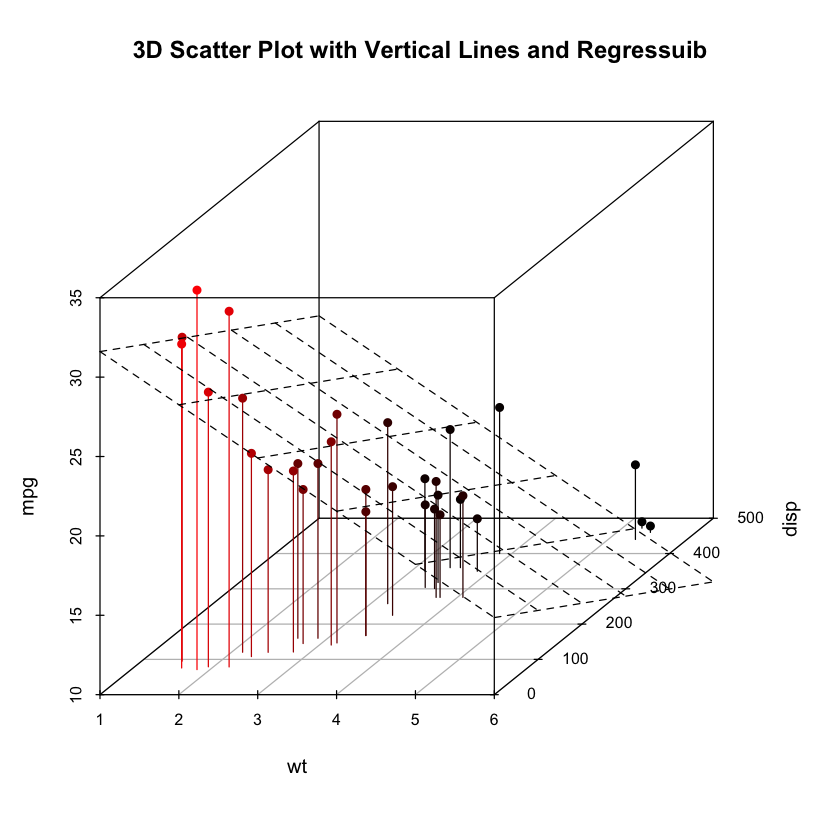

In [21]:
library(scatterplot3d)
attach(mtcars)
s3d = scatterplot3d(wt, disp, mpg, pch = 16, highlight.3d = TRUE, type="h",
                    main = "3D Scatter Plot with Vertical Lines and Regressuib"
                   )
fit = lm(mpg ~ wt+disp)
s3d$plane3d(fit)

#### Spinning 3D scatter plots

3d scatter plots are much easier to interpret if you can interact with them. R provides several mechanisms for rotating graphs so that you can see the plotted points form more than one angle.

In [ ]:
library(rgl)
attach(mtcars)
plot3d(wt, disp, mpg, col='red', size=5)

In [ ]:
library(car)
with(mtcars, scatter3d(wt, disp, mpg))

### Bubble plots
Another approach is to create a 2D scatter plot and use the size of the plotted point to represent the value of third variable. we call it $bubble plot$, which is using $symbols()$ functions

The following objects are masked from mtcars (pos = 3):

    am, carb, cyl, disp, drat, gear, hp, mpg, qsec, vs, wt

The following objects are masked from mtcars (pos = 4):

    am, carb, cyl, disp, drat, gear, hp, mpg, qsec, vs, wt

The following objects are masked from mtcars (pos = 5):

    am, carb, cyl, disp, drat, gear, hp, mpg, qsec, vs, wt

The following objects are masked from mtcars (pos = 6):

    am, carb, cyl, disp, drat, gear, hp, mpg, qsec, vs, wt

The following objects are masked from mtcars (pos = 7):

    am, carb, cyl, disp, drat, gear, hp, mpg, qsec, vs, wt

The following objects are masked from mtcars (pos = 8):

    am, carb, cyl, disp, drat, gear, hp, mpg, qsec, vs, wt

The following objects are masked from mtcars (pos = 9):

    am, carb, cyl, disp, drat, gear, hp, mpg, qsec, vs, wt

The following objects are masked from mtcars (pos = 10):

    am, carb, cyl, disp, drat, gear, hp, mpg, qsec, vs, wt

The following objects are masked from mtcars (pos = 15):

    a

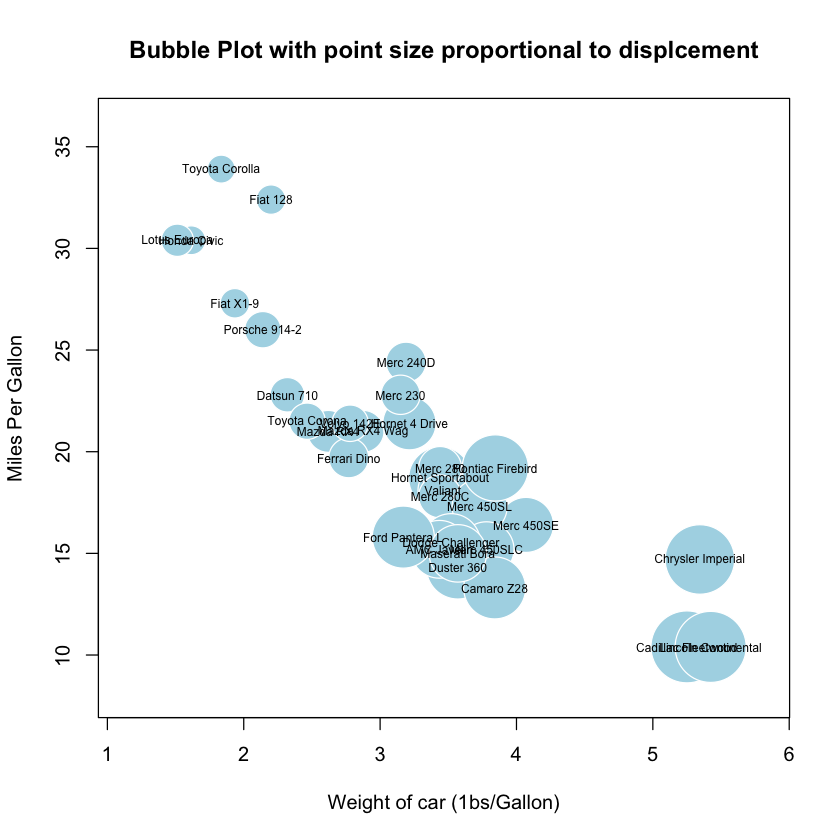

In [22]:
attach(mtcars)
r = sqrt(disp/pi)
symbols(wt, mpg, circle=r, inches = 0.3, fg='white', bg='lightblue',
        main = "Bubble Plot with point size proportional to displcement",
        ylab = "Miles Per Gallon",
        xlab = "Weight of car (1bs/Gallon)"
       )
text(wt, mpg, rownames(mtcars), cex=.6)
detach(mtcars)

## Line Charts

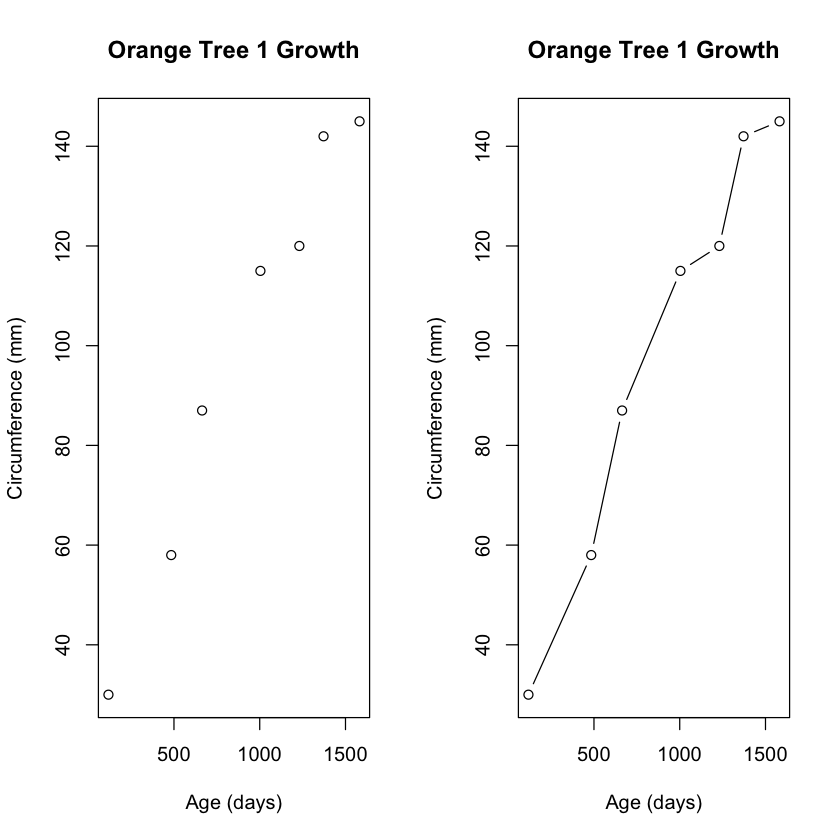

In [27]:
opar = par(no.readonly = TRUE)
par(mfrow = c(1, 2))
t1 = subset(Orange, Tree==1)
plot(t1$age, t1$circumference, 
     xlab = "Age (days)",
     ylab = "Circumference (mm)",
     main = "Orange Tree 1 Growth"
    )
plot(t1$age, t1$circumference, 
     xlab = "Age (days)",
     ylab = "Circumference (mm)",
     main = "Orange Tree 1 Growth",
     type = 'b'
    )

Plot the multi-level line in one plot

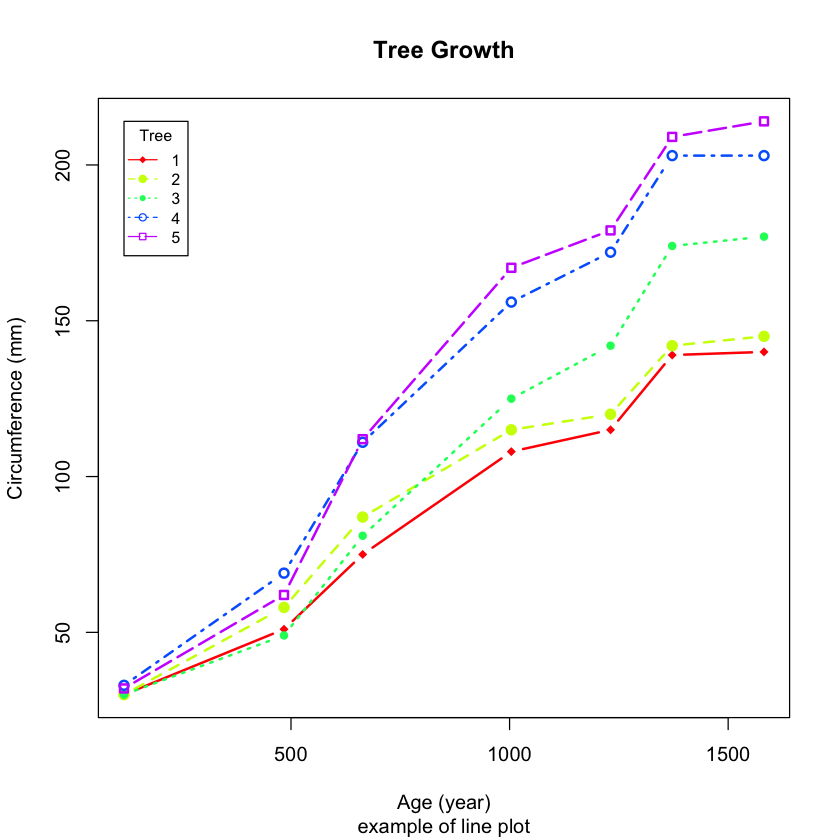

In [30]:
Orange$Tree = as.numeric(Orange$Tree)
ntrees = max(Orange$Tree)

xrange = range(Orange$age)
yrange = range(Orange$circumference)

plot(xrange, yrange, type = 'n', 
     xlab = "Age (year)",
     ylab = "Circumference (mm)"
    )

colors = rainbow(ntrees)
linetype = c(1:ntrees)
plotchar = seq(18, 18+ntrees, 1)

for (i in 1:ntrees){
    tree = subset(Orange, Tree==i)
    lines(tree$age, tree$circumference, 
          type = 'b', lwd = 2, lty = linetype[i],
          col = colors[i], pch = plotchar[i]
         )
}

title("Tree Growth", "example of line plot")

legend(xrange[1], yrange[2], 
       1:ntrees, cex = 0.8, col = colors, 
       pch = plotchar, lty = linetype, title = "Tree"
      )


### remark: using function $par()$
$par()$ function is always used by setting some configration of plot, such as background color, font size ect.
ref: https://blog.csdn.net/Heidlyn/article/details/54581605

## Corrgram
Correlation matrices are a fundamental aspect of multivariate statistics.


In [31]:
options(digits = 2)
cor(mtcars)

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
mpg,1.00,-0.85,-0.85,-0.78,0.681,-0.87,0.419,0.66,0.600,0.48,-0.551
cyl,-0.85,1.00,0.90,0.83,-0.700,0.78,-0.591,-0.81,-0.523,-0.49,0.527
disp,-0.85,0.90,1.00,0.79,-0.710,0.89,-0.434,-0.71,-0.591,-0.56,0.395
hp,-0.78,0.83,0.79,1.00,-0.449,0.66,-0.708,-0.72,-0.243,-0.13,0.750
drat,0.68,-0.70,-0.71,-0.45,1.000,-0.71,0.091,0.44,0.713,0.70,-0.091
wt,-0.87,0.78,0.89,0.66,-0.712,1.00,-0.175,-0.55,-0.692,-0.58,0.428
qsec,0.42,-0.59,-0.43,-0.71,0.091,-0.17,1.000,0.74,-0.230,-0.21,-0.656
vs,0.66,-0.81,-0.71,-0.72,0.440,-0.55,0.745,1.00,0.168,0.21,-0.570
am,0.60,-0.52,-0.59,-0.24,0.713,-0.69,-0.230,0.17,1.000,0.79,0.058
gear,0.48,-0.49,-0.56,-0.13,0.700,-0.58,-0.213,0.21,0.794,1.00,0.274


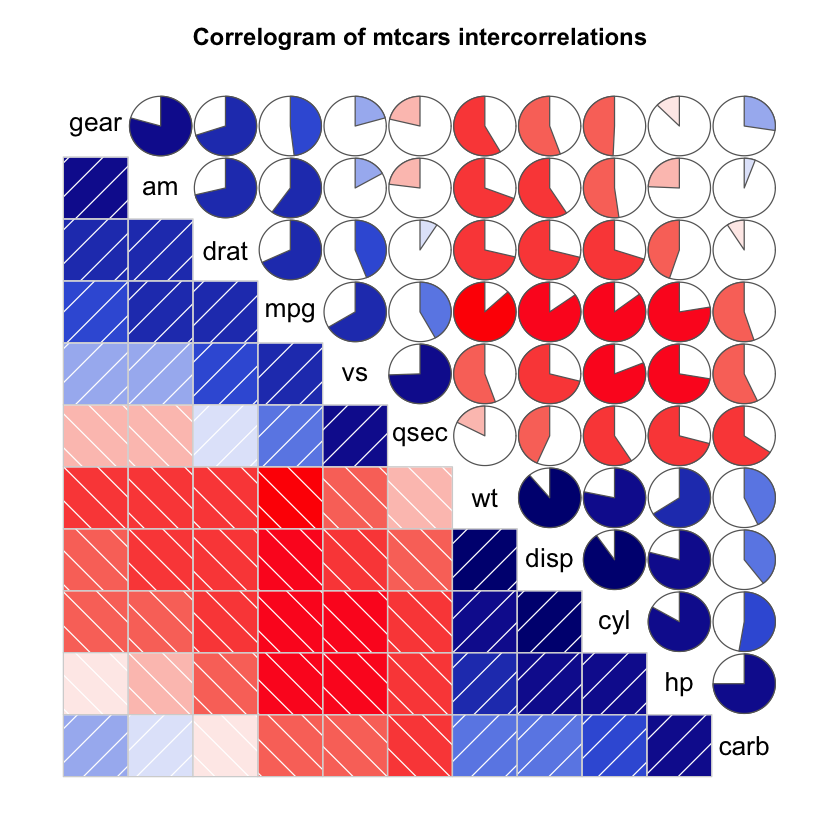

In [39]:
library(corrgram)
corrgram(mtcars, order = TRUE, lower.panel = panel.shade,
         upper.panel = panel.pie, text.panel = panel.txt, 
         main = "Correlogram of mtcars intercorrelations"
        )

Remark:
red: nagative relevant;
blue: positive relevant

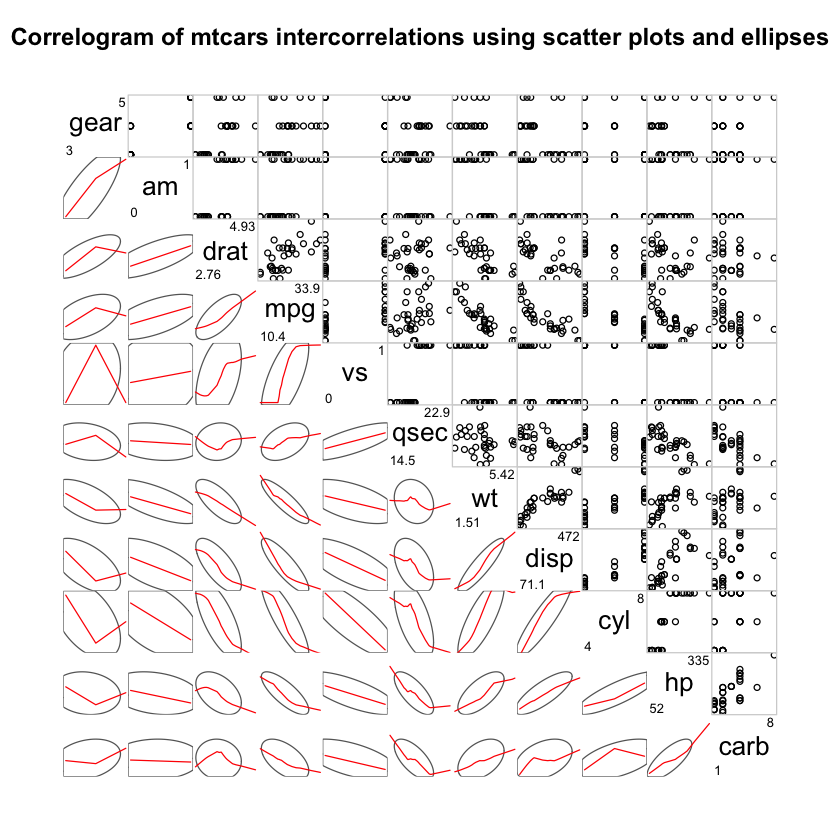

In [51]:
corrgram(mtcars, order = TRUE, lower.panel = panel.ellipse,
         upper.panel = panel.pts, text.panel = panel.txt, 
         diag.panel = panel.minmax,
         main = "Correlogram of mtcars intercorrelations using scatter plots and ellipses"
        )

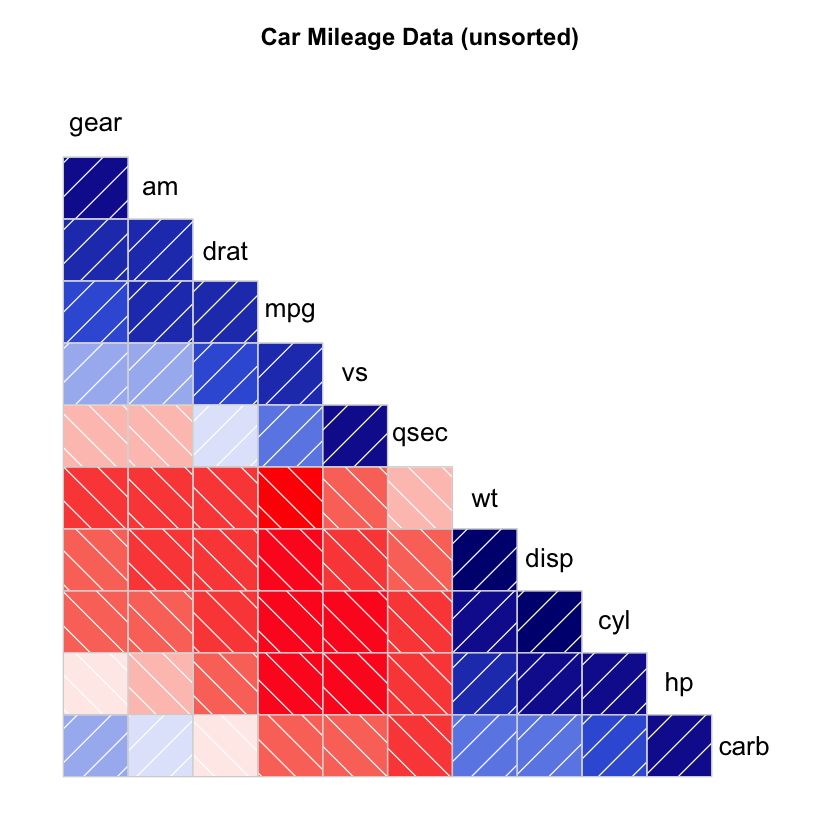

In [52]:
corrgram(mtcars, order = TRUE, lower.panel = panel.shade,
         upper.panel = NULL, text.panel = panel.txt, 
         main = "Car Mileage Data (unsorted)"
        )


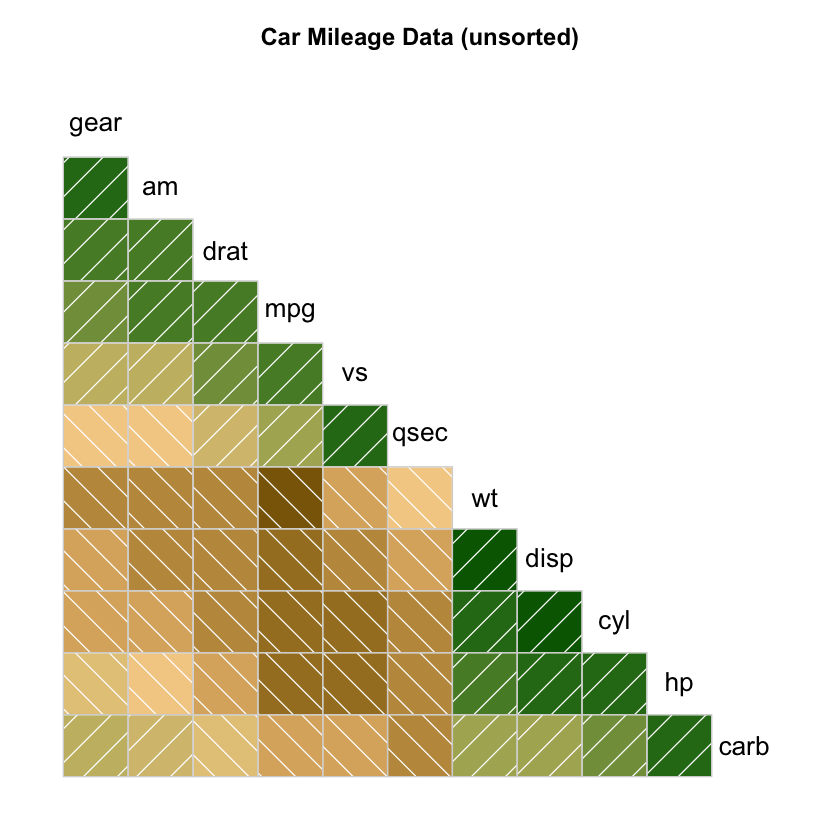

In [62]:
library(corrgram)
col.corrgram = function(ncol){
    colorRampPalette(c("darkgoldenrod4", "burlywood1", 
                       "darkkhaki", "darkgreen"))(ncol)
}
corrgram(mtcars, order = TRUE, lower.panel = panel.shade,
         upper.panel = NULL, text.panel = panel.txt, 
         col.regions=col.corrgram,
         main = "Car Mileage Data (unsorted)"
        )


In [56]:
help(corrgram)

## Mosaic Plots
When you’re looking at a single categorical variable, you can use a bar or pie chart. If there are two categorical variables, you can look at a 3D bar chart (which, by the way, is not easy to do in R). But what do you do if there are more than two categorical variables?

In [34]:
ftable(Titanic)

                   Survived  No Yes
Class Sex    Age                   
1st   Male   Child            0   5
             Adult          118  57
      Female Child            0   1
             Adult            4 140
2nd   Male   Child            0  11
             Adult          154  14
      Female Child            0  13
             Adult           13  80
3rd   Male   Child           35  13
             Adult          387  75
      Female Child           17  14
             Adult           89  76
Crew  Male   Child            0   0
             Adult          670 192
      Female Child            0   0
             Adult            3  20

Loading required package: grid


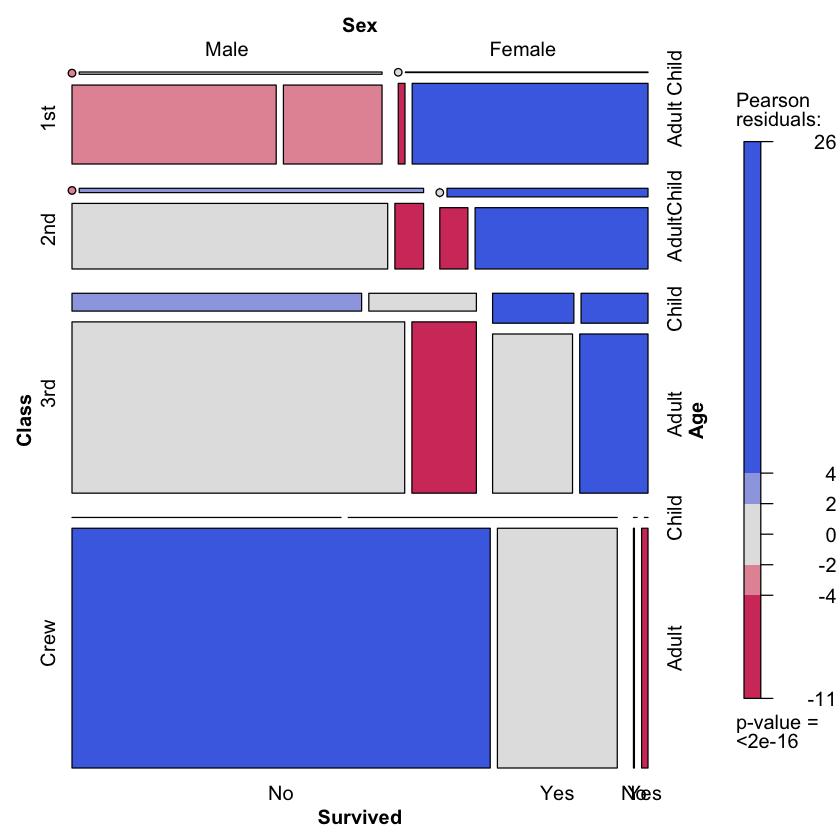

In [35]:
library(vcd)
mosaic(Titanic, shade=TRUE, legend=TRUE)